<a href="https://colab.research.google.com/github/Raivotar/projeto1_bootcamp/blob/main/Notebooks/projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

URL = "https://raw.githubusercontent.com/Raivotar/projeto1_bootcamp/main/Dados/obitos.csv"
dados = pd.read_csv(URL, skiprows= 0, skipfooter= 1, sep=";",
                    thousands=".", decimal=",", engine="python")
regioes = dados.loc[[0, 8, 18, 23, 27]].copy()
dados = dados.drop([0, 8, 18, 23, 27])
regioes = regioes.set_index("Região/Unidade da Federação")
regioes = regioes.drop("Total", axis=1)
regioes =regioes.astype(int)

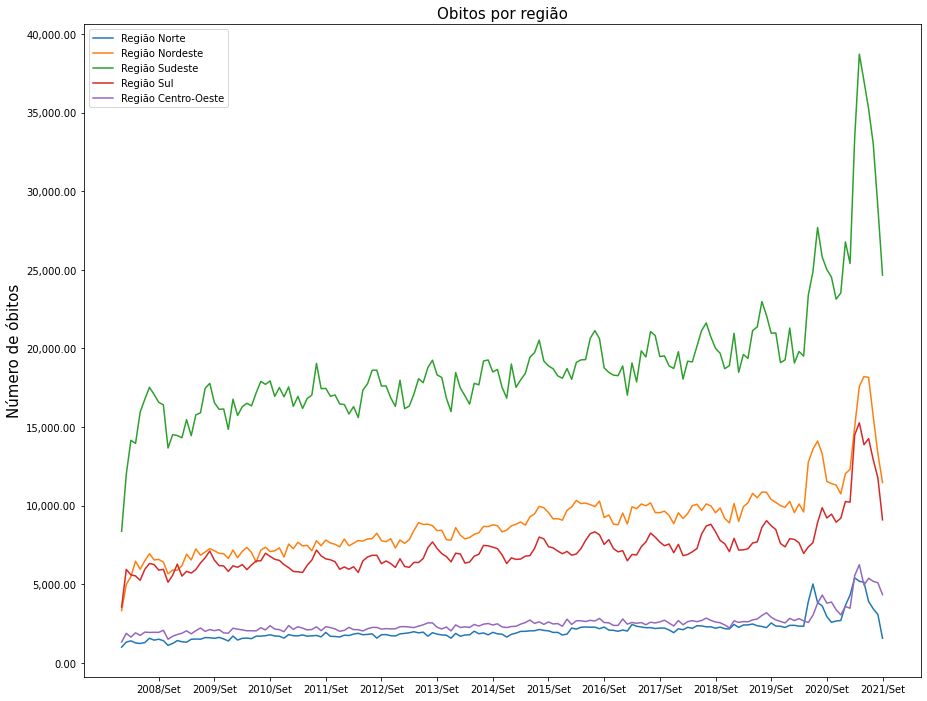

In [2]:
fig, ax = plt.subplots(figsize=(15, 12))

reg = list(regioes.index)
cols = regioes.columns.values

plt.plot(regioes.T)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

ax.set_ylabel("Número de óbitos", size=15)
plt.title("Obitos por região", size=15)
plt.xticks(regioes.T.index[::-12])
plt.yticks()
plt.legend(reg)

plt.show()

Comparei a média de mortos dos últimos 18 meses com os 18 meses anteriores

In [3]:
ultimos18 = regioes.T.iloc[-18:,:].mean()
ultimos18

Região/Unidade da Federação
Região Norte            3632.277778
Região Nordeste        13452.500000
Região Sudeste         27811.444444
Região Sul             10546.055556
Região Centro-Oeste     4134.055556
dtype: float64

In [4]:
ultimos36 = regioes.T.iloc[-36:-18,:].mean()
ultimos36

Região/Unidade da Federação
Região Norte            2345.666667
Região Nordeste        10038.277778
Região Sudeste         20211.833333
Região Sul              7812.166667
Região Centro-Oeste     2704.055556
dtype: float64

É possível concluir que a média de mortes subiu consideravelmente nos últimos 18 meses em decorrencia da pandemia.

In [5]:
for regiao, valor in ultimos18.items():
  print(f"{regiao}: {(ultimos18[regiao] - ultimos36[regiao]):.2f}")

Região Norte: 1286.61
Região Nordeste: 3414.22
Região Sudeste: 7599.61
Região Sul: 2733.89
Região Centro-Oeste: 1430.00
